In [1]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Create binary target variable (1 for quality >= 6, 0 for quality < 6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

                  fixed acidity  volatile acidity  citric acid  \
fixed acidity          1.000000         -0.256131     0.671703   
volatile acidity      -0.256131          1.000000    -0.552496   
citric acid            0.671703         -0.552496     1.000000   
residual sugar         0.114777          0.001918     0.143577   
alcohol               -0.061668         -0.202288     0.109903   

                  residual sugar   alcohol  
fixed acidity           0.114777 -0.061668  
volatile acidity        0.001918 -0.202288  
citric acid             0.143577  0.109903  
residual sugar          1.000000  0.042075  
alcohol                 0.042075  1.000000  


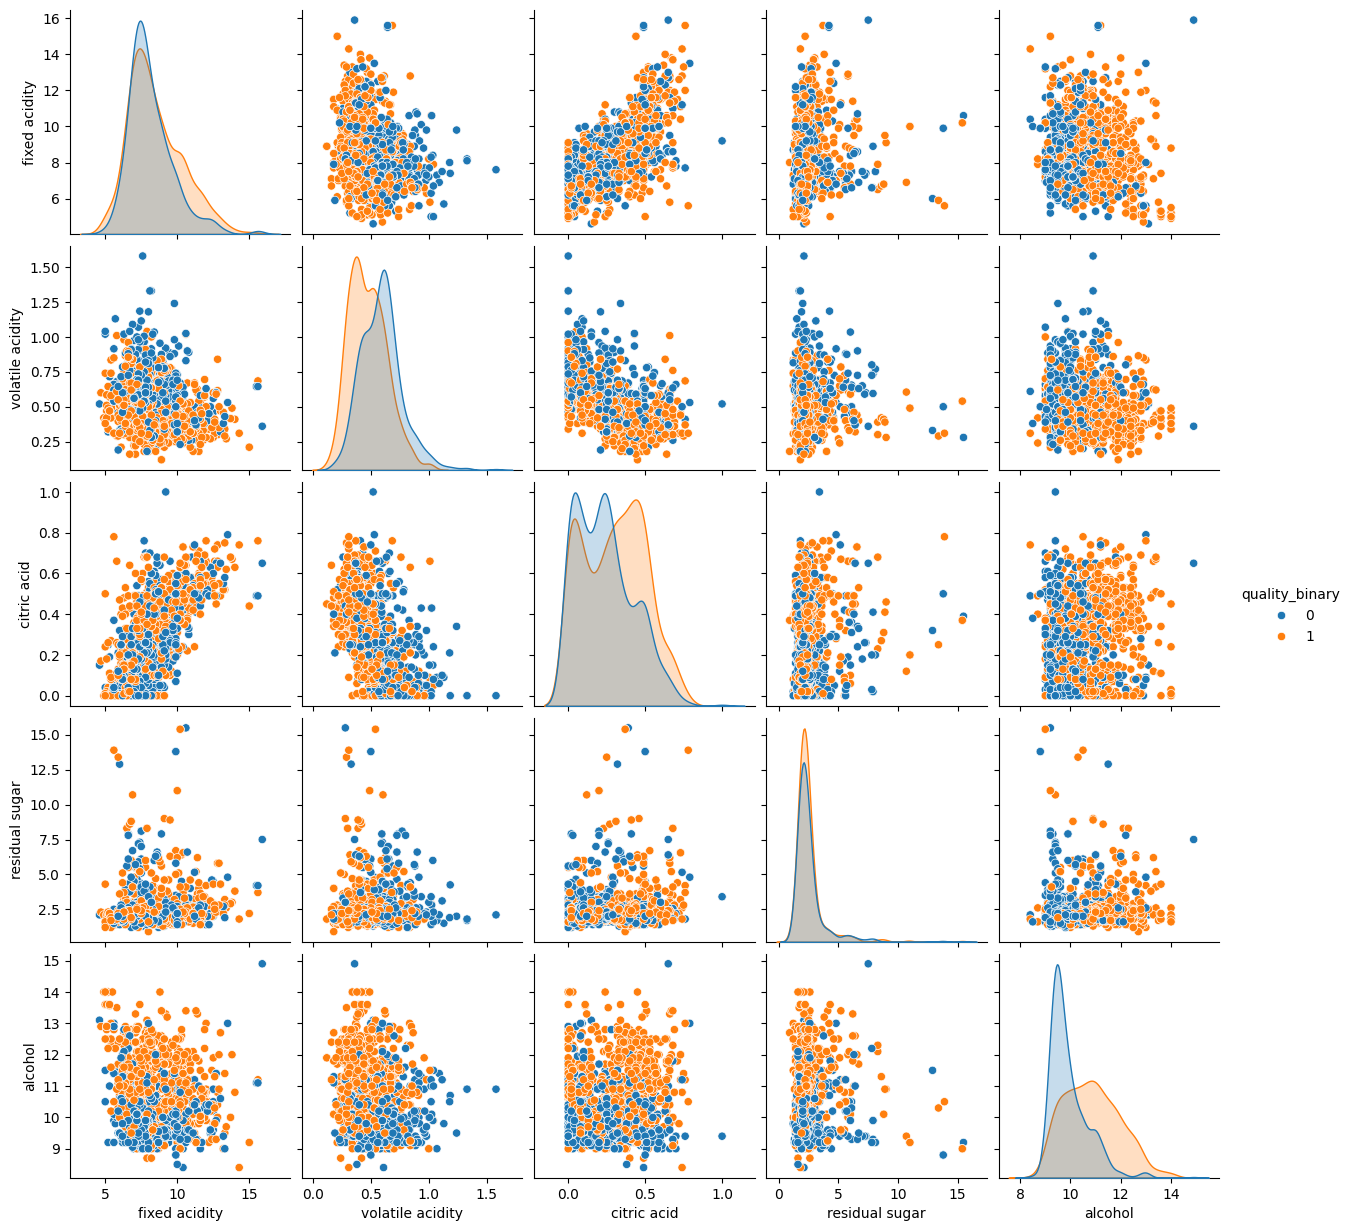

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select up to 5 features for the analysis
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']

# Correlation matrix
correlation_matrix = data[selected_features].corr()
print(correlation_matrix)

# Pairplot using seaborn
sns.pairplot(data[selected_features + ['quality_binary']], hue='quality_binary')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features and target variable
X = data[selected_features]
y = data['quality_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7208333333333333
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       213
           1       0.78      0.70      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480



In [4]:
import statsmodels.api as sm

# Add a constant to the model
X_train_const = sm.add_constant(X_train_scaled)

# Logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.532404
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         quality_binary   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.2305
Time:                        20:49:22   Log-Likelihood:                -595.76
converged:                       True   LL-Null:                       -774.18
Covariance Type:            nonrobust   LLR p-value:                 5.897e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2097      0.073      2.873      0.004       0.067       0.353
x1             0.2807      0.